<a href="https://colab.research.google.com/github/jeetu-g2-1/My_Projects/blob/main/13_Eigenvalue_Decomposition_(EVD)_vs_Singular_Value_Decomposition_(SVD)_on_Olivetti_Face_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from numpy.linalg import eig, svd

Load an image dataset (Olivetti Faces from sklearn)

In [ ]:
data = fetch_olivetti_faces(shuffle=True, random_state=42)
images = data.images  # 400 images of 64x64 pixels

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Select a single image for demonstration

In [ ]:
img = images[0]  # First image in dataset

Eigenvalue Decomposition (EVD) Explanation:

    Given a square matrix A, EVD decomposes it as:
    A = QΛQ^(-1), where:
    - Q: Matrix of eigenvectors
    - Λ (Lambda): Diagonal matrix of eigenvalues

In [ ]:
# Compute EVD (only works for square matrices)
cov_matrix = np.cov(img)  # Covariance matrix of the image
eigenvalues, eigenvectors = eig(cov_matrix)  # Eigen decomposition

Singular Value Decomposition (SVD) Explanation:

    SVD decomposes a matrix A into three matrices:
    A = UΣV^T, where:
    - U: Left singular vectors
    - Σ (Sigma): Diagonal matrix of singular values
    - V^T: Right singular vectors

In [ ]:
# Compute SVD
U, S, Vt = svd(img)

Visualization of difference in EVD and SVD

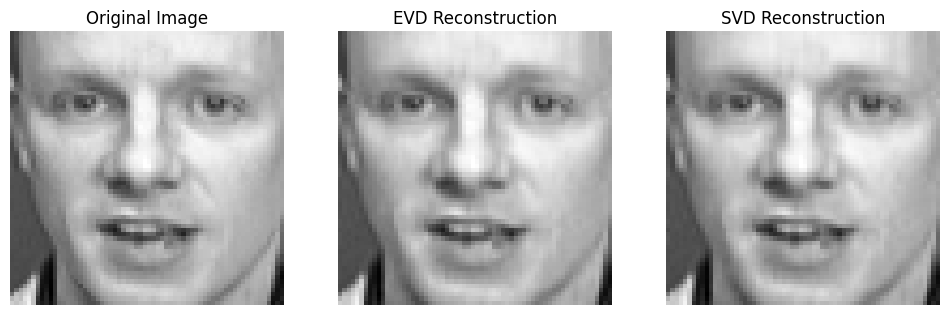

In [ ]:
# Plot original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Reconstruct using Eigen decomposition (PCA-like approach)
pca = PCA(n_components=20)
pca_img = pca.fit_transform(img)  # Reduce dimensions
reconstructed_img_evd = pca.inverse_transform(pca_img)  # Reconstruct

plt.subplot(1, 3, 2)
plt.imshow(reconstructed_img_evd, cmap='gray')
plt.title("EVD Reconstruction")
plt.axis('off')

# Reconstruct using SVD (keeping top 20 singular values)
rank = 20
  # Number of singular values/components to retain

# Approximate the image using the top 'rank' singular values
# This helps in compression while preserving significant details
approx_img_svd = (U[:, :rank] @ np.diag(S[:rank]) @ Vt[:rank, :])
# Explanation:
# 1. U[:, :rank] - Selects the first 'rank' left singular vectors.
# 2. np.diag(S[:rank]) - Constructs a diagonal matrix using top 'rank' singular values.
# 3. Vt[:rank, :] - Selects the first 'rank' right singular vectors.
# 4. The matrix multiplication reconstructs an approximation of the original image,
#    keeping the most significant features while reducing noise and storage size.

plt.subplot(1, 3, 3)
plt.imshow(approx_img_svd, cmap='gray')
plt.title("SVD Reconstruction")
plt.axis('off')

plt.show()

 Summary:

    - EVD works on square covariance matrices and is limited to symmetric cases.
    - SVD works on any matrix and provides a better approximation for dimensionality reduction.
    - SVD is generally more stable and widely used in image compression.
